In [1]:
!wget "https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/6)%20Time%20Series%20Models/Seasonal%20Decomposition%20of%20Time%20Series%20(STL)/cinemaTicket_Ref.csv"

--2024-12-09 15:11:08--  https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/6)%20Time%20Series%20Models/Seasonal%20Decomposition%20of%20Time%20Series%20(STL)/cinemaTicket_Ref.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11243610 (11M) [text/plain]
Saving to: ‘cinemaTicket_Ref.csv’

cinemaTicket_Ref.cs 100%[===================>]  10.72M  --.-KB/s    in 0.07s   

2024-12-09 15:11:08 (153 MB/s) - ‘cinemaTicket_Ref.csv’ saved [11243610/11243610]



In [2]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("cinemaTicket_Ref.csv")
data.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


In [5]:
data['date'] = pd.to_datetime(data['date'])

In [6]:
data.duplicated().sum()

106

In [7]:
data = data.drop_duplicates()

In [8]:
time_series = data.groupby('date')['tickets_sold'].sum()

In [9]:
time_series = time_series.asfreq('D', fill_value=0)

In [10]:
decomposition = seasonal_decompose(time_series, model='additive', period = 7)

<Figure size 1200x600 with 0 Axes>

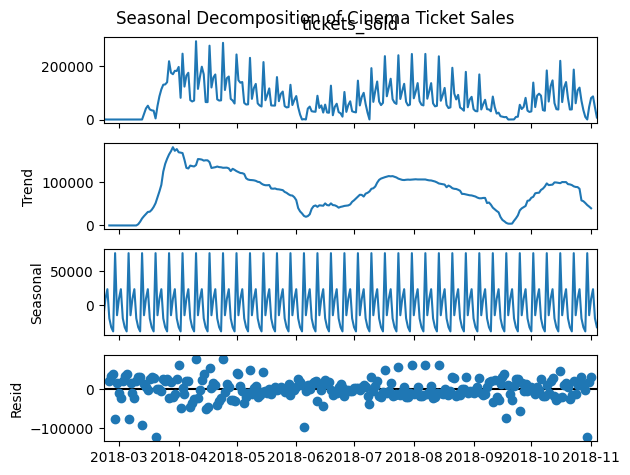

In [11]:
plt.figure(figsize = (12, 6))
decomposition.plot()
plt.suptitle("Seasonal Decomposition of Cinema Ticket Sales")
plt.show()

In [12]:
trend = decomposition.trend
seasonal = decomposition.seasonal
resid = decomposition.resid

In [13]:
print("Trend:")
print(trend.head())
print("\nSeasonality:")
print(seasonal.head())
print("\nResiduals:")
print(resid.head())

Trend:
date
2018-02-21          NaN
2018-02-22          NaN
2018-02-23          NaN
2018-02-24    38.571429
2018-02-25     0.428571
Freq: D, Name: trend, dtype: float64

Seasonality:
date
2018-02-21   -15534.507321
2018-02-22     8868.258552
2018-02-23    23104.821704
2018-02-24   -20164.455734
2018-02-25   -33316.654146
Freq: D, Name: seasonal, dtype: float64

Residuals:
date
2018-02-21             NaN
2018-02-22             NaN
2018-02-23             NaN
2018-02-24    20125.884305
2018-02-25    33316.225575
Freq: D, Name: resid, dtype: float64
